In [3]:
'''Multi-bit quantum random number generation from a single qubit quantum walk'''

import numpy as np
import matplotlib.pyplot as plt
from scipy.linalg import expm
from random import random
import random
from numpy import *
from matplotlib.pyplot import *
import math

up=np.array([1,0]) #coin side 0
down=np.array([0,1]) #coin side 1

C00=outer(up,up) #|0><0| #coin 00
C01=outer(up,down) #|0><1| #coin 01
C10=outer(down,up) #|1><0| #coin 10
C11=outer(down,down) #|1><1| coin 11

#unbiased quantum coin operator
#C=(1/np.sqrt(2))*np.matrix('1 1j; 1j 1') #could also use this, any SU(2) would work
C=(C00+C01+C10-C11)/np.sqrt(2) #Hadamard gate

#roll - we think of positions as points on a circle, so the positions at the end wrap around, but
#we always make the circle big enough to ensure that this doesn't happen
#for example, A=[a0,...aN] A[0]=a0, A[-1]=aN
#eye(P) - array whose elements we wish to roll
#1 or -1 - number of times we need to shift array elements and left or right
#axis - plane, along which we wish to roll array or shift it's elements

#conditional shift operator
def shift(P,Cup,Cdown):
    plus=roll(eye(P),1,axis=0) #right
    minus= roll(eye(P),-1,axis=0) #left
    S=kron(Cup,minus)+kron(Cdown,plus) #shift operator
    return S
    
#quantum random walk operator
def outcome(P,Chat,Cup,Cdown):
    W=shift(P,Cup,Cdown).dot(kron(Chat,eye(P))) #this is our evolution unitary which controls the outcome of our quantum walk
    return W

def logC(x):
    if x != 0:
        return np.log2(x)
    else:
        return 0

C:\Users\Admin\anaconda3\lib\site-packages\numpy\lib\function_base.py:2249: ComplexWarning: Casting complex values to real discards the imaginary part
  res = asanyarray(outputs, dtype=otypes[0])
C:\Users\Admin\AppData\Local\Temp\ipykernel_18412\3541518627.py:27: ComplexWarning: Casting complex values to real discards the imaginary part
  H[i]=np.sum(-P*logCv(P)) #entropy


Everything done up to 0
Everything done up to 1
Everything done up to 2
Everything done up to 3
Everything done up to 4
Everything done up to 5
Everything done up to 6
Everything done up to 7
Everything done up to 8
Everything done up to 9
Everything done up to 10
Everything done up to 11
Everything done up to 12
Everything done up to 13
Everything done up to 14
Everything done up to 15
Everything done up to 16
Everything done up to 17
Everything done up to 18
Everything done up to 19
Everything done up to 20
Everything done up to 21
Everything done up to 22
Everything done up to 23
Everything done up to 24
Everything done up to 25
Everything done up to 26
Everything done up to 27
Everything done up to 28
Everything done up to 29
Everything done up to 30
Everything done up to 31
Everything done up to 32
Everything done up to 33
Everything done up to 34
Everything done up to 35
Everything done up to 36
Everything done up to 37
Everything done up to 38
Everything done up to 39
Everything

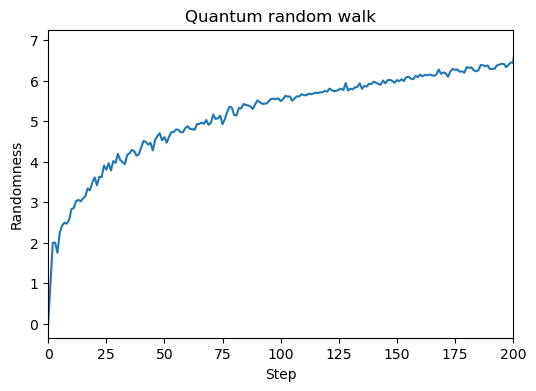

In [2]:
'''generating the states produced by the quantum random walk from a random initial state psi0'''

import numpy as np
import matplotlib.pyplot as plt
from scipy.linalg import expm
from random import random
import random

N=201 #200 steps +1 because we need from 0 to 200

psi0 = np.array([1,0], dtype="complex128") #initial state in coin Hilbert space - I set it to |0> for simplicity

p=(2*N)+1
Wt=outcome(p,C,C00,C11)
position_initial=N
psi_position=np.zeros(p)
psi_position[N]=1 #initial state in position Hilbert space
initial_state=np.kron(psi0, psi_position) #initial state is a tensor product of these two
#print(np.shape(initial_state))
H=np.zeros(N+1)

logCv=np.vectorize(logC)

for i in range (N+1):
    psit=(np.linalg.matrix_power(Wt,i)).dot(initial_state) #evolution of our state at each time-step
    P=psit*(np.conj(psit)) #probabilities at each step
    H[i]=np.sum(-P*logCv(P)) #entropy
    print(f"Everything done up to {i}")
    
#plotting the result
plt.figure(figsize=(6,4))
plt.title('Quantum random walk')
plt.xlabel('Step')
plt.xlim([0,200])
plt.ylabel('Randomness')
plt.plot(H)
#randomness increases logarithmically due to the fact that we used Shannon entropy and we get a multi-bit classical output
#string if we place detectors and measure at every possible position (we get one string from the state and another from
#from its position) - this is all from just one qubit while a classical bit can only carry 1 bit of classical information!